<a href="https://colab.research.google.com/github/Teejardni/pokemon-data-analysis/blob/main/PokemonTyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://pokemondb.net/type'
response = requests.get(url)
response.raise_for_status()
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')
type_table = soup.find('table', class_='type-table')
header_row = type_table.find('thead').find('tr')
defending_types = [
        link['title'] for cell in header_row.find_all('th')[1:]
        if (link := cell.find('a')) and 'title' in link.attrs
    ]

tbody = type_table.find('tbody')
rows = tbody.find_all('tr')

attacking_types = []
effectiveness_data = []

for row in rows:
        cells = row.find_all(['th', 'td'])

        attacking_cell = cells[0]
        if (attacking_link := attacking_cell.find('a')):
            attacking_type = attacking_link.get_text().strip()
            attacking_types.append(attacking_type)

            row_data = []
            for cell in cells[1:]:
                cell_classes = cell.get('class', [])
                if 'type-fx-0' in cell_classes: effectiveness = 0.0
                elif 'type-fx-50' in cell_classes: effectiveness = 0.5
                elif 'type-fx-200' in cell_classes: effectiveness = 2.0
                else: effectiveness = 1.0
                row_data.append(effectiveness)

            effectiveness_data.append(row_data)

    # Create DataFrame
df = pd.DataFrame(effectiveness_data, index=attacking_types, columns=defending_types)

In [3]:
df

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


### Offensive strength O
O is the average effectiveness of type a when attacking a uniformly random defender type.
- Computed as the row mean in the type-effectiveness matrix.
- High O means the type often hits others for >1× (strong offensive presence).
- Normalized to [0,1] so it can be combined fairly with other metrics.


In [4]:
O_raw = df.mean(axis=1)
O_norm = (O_raw - O_raw.min()) / (O_raw.max() - O_raw.min())
O_df = pd.DataFrame({
    "O_raw": O_raw,
    "O_norm": O_norm
})
O_df_sorted = O_df.sort_values("O_norm", ascending=False)

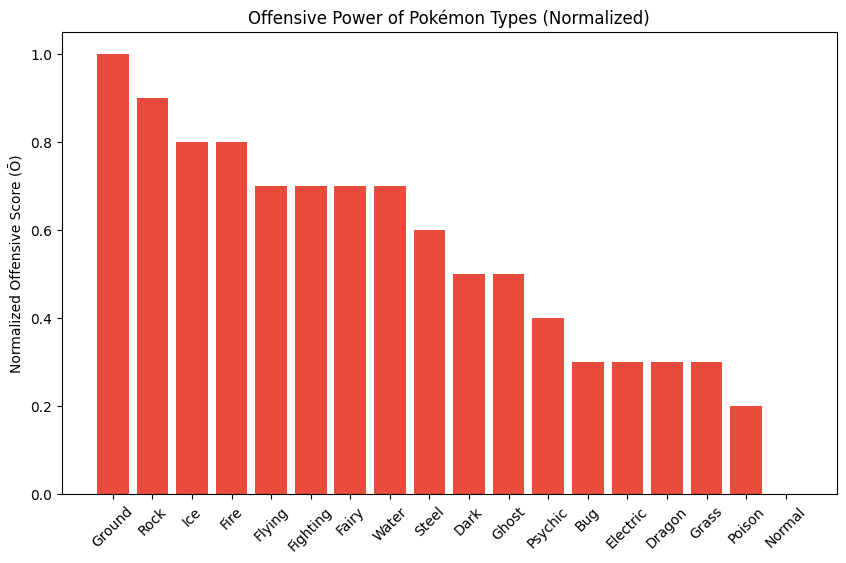

In [5]:
plt.figure(figsize=(10,6))
plt.bar(O_df_sorted.index, O_df_sorted["O_norm"], color="#E74C3C")
plt.xticks(rotation=45)
plt.ylabel("Normalized Offensive Score (Ō)")
plt.title("Offensive Power of Pokémon Types (Normalized)")
plt.show()

### Conclusions from Offensive Scores (O)

- Ground, Rock, Fire, and Ice types are the strongest attackers by chart coverage, each hitting many other types for 2×.
- Normal, Poison, and Bug are the weakest attackers; Normal in particular has no super-effective matchups and even fails against Ghost.



### Defensive prowess D
D is the average effectiveness of type a when attacking a uniformly random defender type.
- Computed as the row mean in the type-effectiveness matrix.
- High D means the type often hits others for >1× (strong offensive presence).
- Normalized to [0,1] so it can be combined fairly with other metrics.

In [6]:
V_raw = df.mean(axis=0) #This is how vulnerable they are to each type

# Min-max normalize vulnerabilities
V_norm = (V_raw - V_raw.min()) / (V_raw.max() - V_raw.min())

# Invert to get Defense score (higher means more resistant)
D_norm = 1 - V_norm
D_df = pd.DataFrame({
    "V_raw": V_raw,
    "D_norm": D_norm
})

D_df_sorted = D_df.sort_values("D_norm", ascending=False)


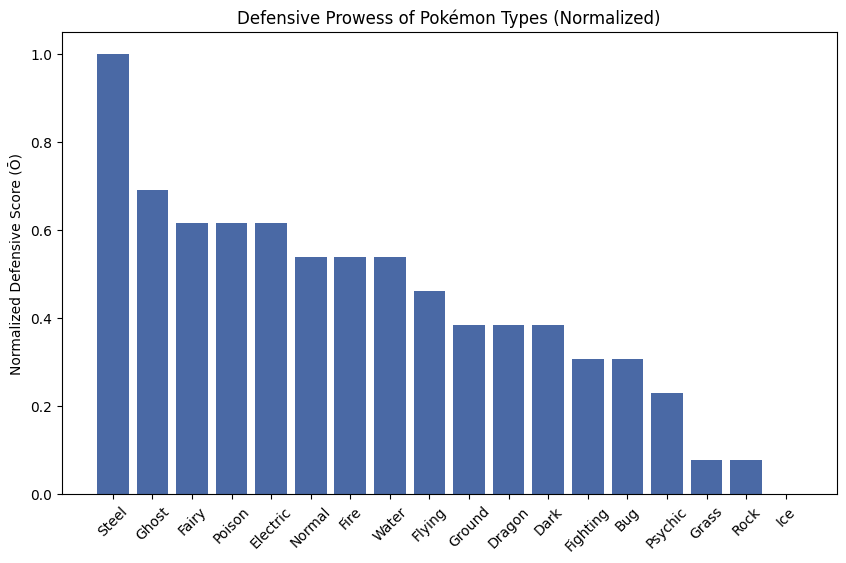

In [7]:
plt.figure(figsize=(10,6))
plt.bar(D_df_sorted.index, D_df_sorted["D_norm"], color="#4A69A5")
plt.xticks(rotation=45)
plt.ylabel("Normalized Defensive Score (Ō)")
plt.title("Defensive Prowess of Pokémon Types (Normalized)")
plt.show()

### Immunity & Coverage components
- **Immunities (I):** A single immunity can completely shut down certain opponents.
  - Example: Ground immunity to Electric, Ghost immunity to Normal/Fighting.
  - We count 0× and 0.5× matchups, normalize, and give more weight to true immunities.
- **Coverage (C):** Offensive versatility matters.
  - A type that hits many others for 2× is more useful than one that only threatens a few.
  - We count 2× matchups per attack type and normalize.
- Together, I and C highlight structural strengths/weaknesses that average scores (O, D) alone might underweight.

In [8]:
n_zero = (df == 0.0).sum(axis=0)   # immunities
n_half = (df == 0.5).sum(axis=0)   # resistances

# Normalize counts
n_zero_norm = (n_zero - n_zero.min()) / (n_zero.max() - n_zero.min())
n_half_norm = (n_half - n_half.min()) / (n_half.max() - n_half.min())

I_score = 0.7 * n_zero_norm + 0.3 * n_half_norm

I_df = pd.DataFrame({"n_zero": n_zero,"n_half": n_half,"I_norm": I_score})

In [9]:
C_count = (df == 2.0).sum(axis=1)
C_score = (C_count - C_count.min()) / (C_count.max() - C_count.min())
C_df = pd.DataFrame({"coverage_count": C_count, "C_norm": C_score})

## Final Type Strength Score

We combine all components into a single weighted score:

S = 0.35·O + 0.35·D + 0.15·I + 0.15·C


In [10]:
w_O, w_D, w_I, w_C = 0.35, 0.35, 0.15, 0.15

S = w_O * O_norm + w_D * D_norm + w_I * I_score + w_C * C_score

S_df = pd.DataFrame({"Strength Score (S)": S})

S_df_sorted = S_df.sort_values("Strength Score (S)", ascending=False)

In [11]:
S_df_sorted

,Strength Score (S)
Steel,0.747500
Ground,0.696115
Fairy,0.616385
Fire,0.615462
Ghost,0.591308
Flying,0.562538
Water,0.541462
Fighting,0.516192
Rock,0.479923
Dark,0.431115


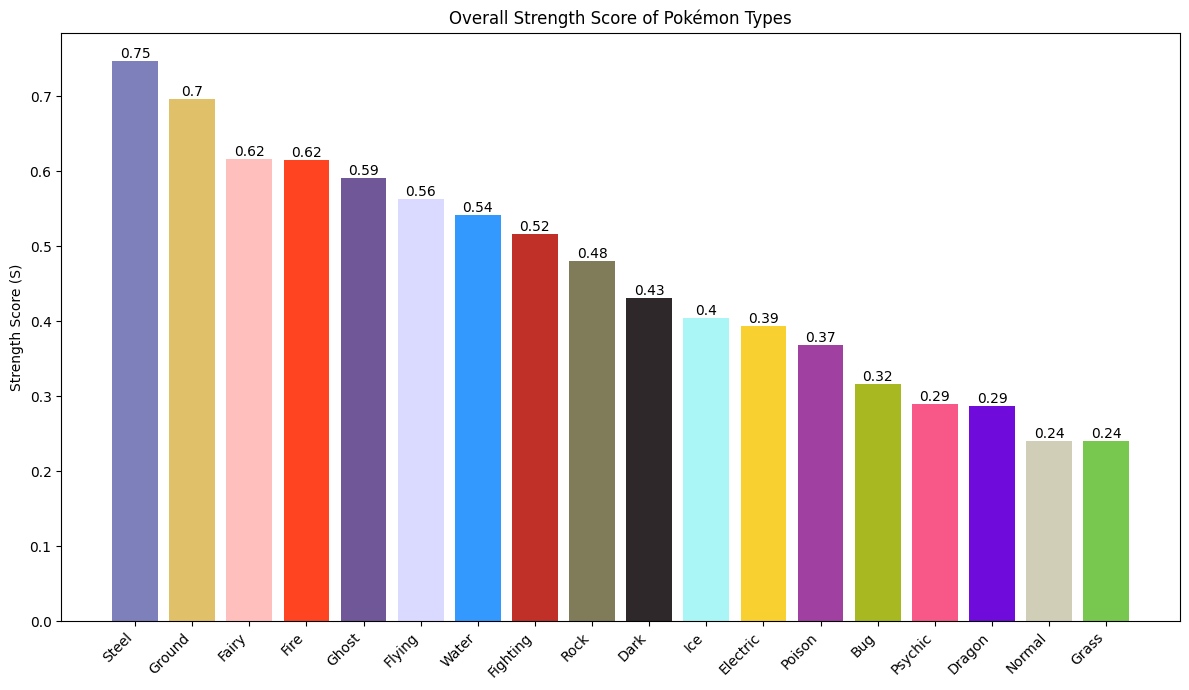

In [23]:
plt.figure(figsize=(12, 7))

colors = [
    '#7e80bc',  #Steel
    '#e0c068',  #Ground
    '#ffc0bd',  #Fairy
    '#ff4422',  #Fire
    '#705898',  #Ghost
    '#dad9ff',  #Flying
    '#3399ff',  #Water
    '#c03028',  #Fighting
    '#807c59',  #Rock
    '#2E282A',  #Dark
    '#aaf5f5',  #Ice
    '#f8d030',  #Electric
    '#a040a0',  #Poison
    '#a8b820',  #Bug
    '#f85888',  #Psychic
    '#700cdb',  #Dragon
    '#d1ceb7',  #Normal
    '#78c850',  #Grass
]


bars = plt.bar(S_df_sorted.index, S_df_sorted["Strength Score (S)"], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Strength Score (S)")
plt.title("Overall Strength Score of Pokémon Types")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()